# Assignment 1

**Submission deadline:**
* **Problems 1-4: last lab session before or on Wednesday, 18.10.17**
* **Problems 5-6: last lab session before or on Wednesday, 25.10.17**

**Points: 10 + 4 bonus points**

Please note: some of the assignments are tedious or boring if you are already a NumPy ninja. The bonus problems were designed to give you a more satisfying alternative.

## Downloading this notebook

This assignment is an Jupyter notebook. Download it by cloning https://github.com/janchorowski/nn_assignments. Follow the instructions in its README for instructions. Whenever possible, add your solutions to the notebook. 

Please email us about any problems with it - we will try to correct them quickly. Also, please do not hesitate to use **GitHub’s pull requests** to send us corrections!

In [1]:
# Standard IPython notebook imports
%matplotlib inline

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
from sklearn import datasets



## Problem 0 [0p]
1. Get familiar with [lab_guide.pdf](https://github.com/janchorowski/nn_assignments/blob/nn17_fall/lab_guide.pdf). It is not obligatory to use the labs remotely and most of the time you will do just fine with your own machine. However, we recommend using labs for the most computationally-intensive tasks such as the final projects.

    Make sure you know how to:
    * load the Anaconda Python distribution with `/pio/os/anaconda/set-env.sh` (confirm with `python -V`)
    <br/>
    (also: look into this `nn_assignments`' `set-env.sh` and see that it loads `Anaconda` for you),
    * connect to labs 110/137 from *outside* of the faculty,
    * copy a file over an ssh tunnel or connect remotely to a Jupyter Notebook,
    * use `GNU screen`, `tmux` and/or `nohup`,
    * leave a process running, disconnect, connect again and verify it is still running.
  
  In case of problems, ask for help!
  
  
2. Read [Jupyter tutorial from Data Analysis in Biological Sciences course at Caltech](http://bebi103.caltech.edu/2015/tutorials/t0b_intro_to_jupyter_notebooks.html) (which itself can be downloaded as a Jupyter notebook). Feel free to skip the tutorial if you have some prior experience with Jupyter notebook.

## Problem 1 [2p]

First, get familiar with Python at https://docs.python.org/2/tutorial/. Then, get
to know the capabilities of NumPy, the prime numerical library of Python http://www.numpy.org/, for instance with the tutorial at http://wiki.scipy.org/Tentative_NumPy_Tutorial.

You might also need:
  1. another intro to NumPy,
http://people.duke.edu/~ccc14/pcfb/numerics.html
  2. a better interactive shell for Python,
http://ipython.org/
  3. access to IPython through an ordinary web browser,
http://ipython.org/notebook.html
  4. a plotting library for Python.
http://matplotlib.org/

**a) Declare variables:**
1. $a=10$,
2. $b=2.5\times 10^{23}$,
3. $c=2+3i$, where $i$ is an imaginary unit,
4. $d=e^{i2\pi/3}$, where $i$ is an imaginary unit, $e$ is the Euler's number (use `exp`, `pi`).

In [6]:
# TODO: Complete the declarations
a = 10
b = 2.5 * 10**23
c = 2+3j
d = np.exp(1j*2*np.pi/3)

In [7]:
a

10

In [8]:
b

2.5e+23

In [9]:
c

(2+3j)

In [10]:
d

(-0.49999999999999978+0.86602540378443871j)

**b) Declare vectors:**
1. $aVec=\begin{bmatrix} 3.14 & 15 & 9 & 26 \end{bmatrix}$,
2. $bVec=\begin{bmatrix} 2.71 & 8 & 28 & 182 \end{bmatrix}^\intercal$ (column vector),
3. $cVec=\begin{bmatrix} 5 & 4.8 & \cdots & -4.8 & -5 \end{bmatrix}$ (vector of numbers from $5$ to $-5$ decreasing by $0.2$),
4. $dVec=\begin{bmatrix} 10^0 & 10^{0.01} & \cdots & 10^{0.99} & 10^1 \end{bmatrix}$ (logarithmically spaced numbers from 1 to 10, use `logspace` and make sure, that the result has correct length!),
5. $eVec=Hello$ ($eVec$ is a string of characters, thus a vector).

In [22]:
aVec = np.array([3.14, 15, 9, 26])
bVec = np.array([[2.71],
                 [8],
                 [28],
                 [182]])
cVec = np.arange(5, -5.1, -0.2)
#logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)
dVec = np.logspace(0, 1, num=101, endpoint=True, base=10.0)
eVec = np.array(list('Hello'))

In [23]:
eVec

array(['H', 'e', 'l', 'l', 'o'],
      dtype='|S1')

In [62]:
bVec

array([[   2.71],
       [   8.  ],
       [  28.  ],
       [ 182.  ]])

In [63]:
cVec

array([  5.00000000e+00,   4.80000000e+00,   4.60000000e+00,
         4.40000000e+00,   4.20000000e+00,   4.00000000e+00,
         3.80000000e+00,   3.60000000e+00,   3.40000000e+00,
         3.20000000e+00,   3.00000000e+00,   2.80000000e+00,
         2.60000000e+00,   2.40000000e+00,   2.20000000e+00,
         2.00000000e+00,   1.80000000e+00,   1.60000000e+00,
         1.40000000e+00,   1.20000000e+00,   1.00000000e+00,
         8.00000000e-01,   6.00000000e-01,   4.00000000e-01,
         2.00000000e-01,  -4.44089210e-15,  -2.00000000e-01,
        -4.00000000e-01,  -6.00000000e-01,  -8.00000000e-01,
        -1.00000000e+00,  -1.20000000e+00,  -1.40000000e+00,
        -1.60000000e+00,  -1.80000000e+00,  -2.00000000e+00,
        -2.20000000e+00,  -2.40000000e+00,  -2.60000000e+00,
        -2.80000000e+00,  -3.00000000e+00,  -3.20000000e+00,
        -3.40000000e+00,  -3.60000000e+00,  -3.80000000e+00,
        -4.00000000e+00,  -4.20000000e+00,  -4.40000000e+00,
        -4.60000000e+00,

In [64]:
dVec

array([  1.        ,   1.02329299,   1.04712855,   1.07151931,
         1.0964782 ,   1.12201845,   1.14815362,   1.17489755,
         1.20226443,   1.23026877,   1.25892541,   1.28824955,
         1.31825674,   1.34896288,   1.38038426,   1.41253754,
         1.44543977,   1.47910839,   1.51356125,   1.54881662,
         1.58489319,   1.6218101 ,   1.65958691,   1.69824365,
         1.73780083,   1.77827941,   1.81970086,   1.86208714,
         1.90546072,   1.9498446 ,   1.99526231,   2.04173794,
         2.08929613,   2.13796209,   2.18776162,   2.23872114,
         2.29086765,   2.34422882,   2.39883292,   2.45470892,
         2.51188643,   2.57039578,   2.63026799,   2.6915348 ,
         2.7542287 ,   2.81838293,   2.8840315 ,   2.95120923,
         3.01995172,   3.09029543,   3.16227766,   3.23593657,
         3.31131121,   3.38844156,   3.4673685 ,   3.54813389,
         3.63078055,   3.71535229,   3.80189396,   3.89045145,
         3.98107171,   4.07380278,   4.16869383,   4.26

In [70]:
eVec

'Hello'

**c) Declare matrices:**
1. $aMat=\begin{bmatrix}
                    2      & \cdots & 2 \\
                    \vdots & \ddots & \vdots \\
                    2      & \cdots & 2
                \end{bmatrix}$,
<br/>
matrix $9\times 9$ filled with 2s (use `ones` or `zeros`),
2. $bMat=\begin{bmatrix}
                    1      & 0      & \cdots &        & 0      \\
                    0      & \ddots & 0      &        & 0      \\
                    \vdots & 0      & 5      & 0      & \vdots \\
                           &        & 0      & \ddots & 0      \\
                    0      &        & \cdots & 0      & 1
                \end{bmatrix}$,
<br/>
matrix $9\times 9$ filled with zeros, with $\begin{bmatrix} 1 & 2 & 3 & 4 & 5 & 4 & 3 & 2 & 1 \end{bmatrix}$ on its diagonal (use `zeros`, `diag`),
3. $cMat=\begin{bmatrix}
                    1      & 11     & \cdots & 91     \\
                    2      & 12     & \ddots & 92     \\
                    \vdots & \vdots & \ddots & \vdots \\
                    10     & 20     & \cdots & 100
                \end{bmatrix}$,
<br/>
matrix $10\times 10$, columns of which form the vector $1:100$ (use `reshape`),
4. $dMat=\begin{bmatrix}
                    NaN & NaN & NaN & NaN \\
                    NaN & NaN & NaN & NaN \\
                    NaN & NaN & NaN & NaN
                \end{bmatrix}$,
<br/>
matrix $3\times 4$ filled with `NaN`s (use... `NaN`),
5. $eMat=\begin{bmatrix}
                    13  & -1  & 5  \\
                    -22 & 10  & -87
                \end{bmatrix}$,
<br/>
6. $fMat$ filled with random natural numbers from $[-3,3]$ (use `rand` and `floor` or `ceil`).

In [24]:
np.full?

In [170]:
aMat = np.ones((9,9))*2
bMat = np.diag(np.array([1,2,3,4,5,4,3,2,1]))
cMat = np.arange(100).reshape(10,10).transpose()+1
dMat = np.full((3,4), np.nan)
eMat = np.array([[13,-1,5],
                 [-22,10,-87]])
fMat = np.floor(np.random.rand(10,10)*7-3)

In [171]:
aMat

array([[ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.]])

In [172]:
bMat

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [173]:
cMat

array([[  1,  11,  21,  31,  41,  51,  61,  71,  81,  91],
       [  2,  12,  22,  32,  42,  52,  62,  72,  82,  92],
       [  3,  13,  23,  33,  43,  53,  63,  73,  83,  93],
       [  4,  14,  24,  34,  44,  54,  64,  74,  84,  94],
       [  5,  15,  25,  35,  45,  55,  65,  75,  85,  95],
       [  6,  16,  26,  36,  46,  56,  66,  76,  86,  96],
       [  7,  17,  27,  37,  47,  57,  67,  77,  87,  97],
       [  8,  18,  28,  38,  48,  58,  68,  78,  88,  98],
       [  9,  19,  29,  39,  49,  59,  69,  79,  89,  99],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

In [174]:
dMat

array([[ nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan]])

In [175]:
eMat

array([[ 13,  -1,   5],
       [-22,  10, -87]])

In [176]:
fMat

array([[ 2.,  0.,  3., -1.,  3.,  3., -1., -2.,  1., -2.],
       [-1., -1.,  3., -2.,  0., -3.,  1.,  1., -1.,  2.],
       [-1.,  2.,  1., -1.,  2.,  3., -2.,  1.,  2.,  2.],
       [ 3., -3.,  0.,  1.,  1., -2., -1.,  2.,  1., -2.],
       [-3., -1., -2., -2.,  0., -1., -1., -3.,  2., -2.],
       [ 0., -2.,  3., -2., -2., -2.,  2., -3.,  3.,  2.],
       [ 2., -3., -3.,  2.,  2., -1.,  3.,  1.,  1.,  2.],
       [-2.,  3., -3.,  3., -3.,  0., -3.,  1.,  2.,  2.],
       [-1.,  2., -2., -1., -3., -2.,  1.,  3.,  2., -3.],
       [ 1.,  2.,  1., -1., -2.,  3.,  3.,  2.,  1., -3.]])

** d) Declare a multiplication table ** as a $10\times 10$ matrix `mulMat`. Use matrix/vector multiplication.

In [219]:
mulMat = np.multiply(np.arange(10).reshape(-1,1)+1, np.arange(10)+1)

In [220]:
mulMat

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

** e) Compute elemwise using values from b).**
For instance, the first element of $xVec[0]$ should be equal to

\begin{equation}
1/(\sqrt{2\pi2.5^2}) e^{-cVec[0]^2 / (2\cdot\pi 2.5^2)}.
\end{equation}

1. $xVec=1/(\sqrt{2\pi2.5^2}) e^{-cVec^2 / (2\cdot\pi 2.5^2)}$
2. $yVec=\sqrt{(aVec^\intercal)^2 + bVec^2}$
3. $zVec=\log_{10}(1/dVec)$, using `log10`

In [242]:
xVec = 1/(np.sqrt(2*np.pi*(2.5**2)))*np.exp(-cVec**2/2*np.pi*(2.5**2))
yVec = np.sqrt(aVec.reshape(-1,1)**2 + bVec**2)
zVec = np.log10(1/dVec)

In [243]:
xVec

array([  4.08382773e-108,   9.28693873e-100,   9.62905482e-092,
         4.55198319e-084,   9.81123214e-077,   9.64167226e-070,
         4.32003326e-063,   8.82526442e-057,   8.22004651e-051,
         3.49081420e-045,   6.75904138e-040,   5.96690864e-035,
         2.40170456e-030,   4.40753417e-026,   3.68788785e-022,
         1.40690779e-018,   2.44714371e-015,   1.94070367e-012,
         7.01721673e-010,   1.15684844e-007,   8.69548783e-006,
         2.98000745e-004,   4.65636117e-003,   3.31727809e-002,
         1.07751423e-001,   1.59576912e-001,   1.07751423e-001,
         3.31727809e-002,   4.65636117e-003,   2.98000745e-004,
         8.69548783e-006,   1.15684844e-007,   7.01721673e-010,
         1.94070367e-012,   2.44714371e-015,   1.40690779e-018,
         3.68788785e-022,   4.40753417e-026,   2.40170456e-030,
         5.96690864e-035,   6.75904138e-040,   3.49081420e-045,
         8.22004651e-051,   8.82526442e-057,   4.32003326e-063,
         9.64167226e-070,   9.81123214e-

In [244]:
yVec

array([[   4.14773432],
       [  17.        ],
       [  29.41088234],
       [ 183.84776311]])

In [245]:
zVec

array([ 0.  , -0.01, -0.02, -0.03, -0.04, -0.05, -0.06, -0.07, -0.08,
       -0.09, -0.1 , -0.11, -0.12, -0.13, -0.14, -0.15, -0.16, -0.17,
       -0.18, -0.19, -0.2 , -0.21, -0.22, -0.23, -0.24, -0.25, -0.26,
       -0.27, -0.28, -0.29, -0.3 , -0.31, -0.32, -0.33, -0.34, -0.35,
       -0.36, -0.37, -0.38, -0.39, -0.4 , -0.41, -0.42, -0.43, -0.44,
       -0.45, -0.46, -0.47, -0.48, -0.49, -0.5 , -0.51, -0.52, -0.53,
       -0.54, -0.55, -0.56, -0.57, -0.58, -0.59, -0.6 , -0.61, -0.62,
       -0.63, -0.64, -0.65, -0.66, -0.67, -0.68, -0.69, -0.7 , -0.71,
       -0.72, -0.73, -0.74, -0.75, -0.76, -0.77, -0.78, -0.79, -0.8 ,
       -0.81, -0.82, -0.83, -0.84, -0.85, -0.86, -0.87, -0.88, -0.89,
       -0.9 , -0.91, -0.92, -0.93, -0.94, -0.95, -0.96, -0.97, -0.98,
       -0.99, -1.  ])

** f) Compute with matrix/vector operations using values from c).**

**NOTE:** Every multiplication (and power) in this subtask is a [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication).
1. $xMat=(aVec\cdot bVec)aMat^2$,
2. $yMat=bVec\cdot aVec$
<br/>
(remember, that matrix multiplication is not commutative),
4. $zMat=\lvert cMat\rvert (aMat\cdot bMat)^\intercal$, where $\lvert A\rvert$ denotes determinant of $A$ (use `det`).

In [26]:
np.multiply?

In [291]:
xMat = np.dot(np.dot(aVec, bVec), np.dot(aMat, aMat)) #np.multiply(np.dot(aVec, bVec), np.dot(aMat, aMat))
yMat = np.multiply(bVec, aVec)
zMat = np.multiply(np.linalg.det(cMat), np.transpose(np.multiply(aMat, bMat)))

ValueError: shapes (1,) and (9,9) not aligned: 1 (dim 0) != 9 (dim 0)

In [289]:
yMat

array([[    8.5094,    40.65  ,    24.39  ,    70.46  ],
       [   25.12  ,   120.    ,    72.    ,   208.    ],
       [   87.92  ,   420.    ,   252.    ,   728.    ],
       [  571.48  ,  2730.    ,  1638.    ,  4732.    ]])

In [290]:
zMat

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

** g) Declare `ismagic(A)` function ** which checks if matrix $A$ is a [magic square](https://en.wikipedia.org/wiki/Magic_square) and returns a boolean.

In [72]:
np.sum?

In [ ]:
A.sum(axis=0)

In [106]:
def ismagic(A):
    dimensions = int(np.sqrt(A.size))
    diag1 = np.sum(np.diag(A))
    diag2 = np.sum(np.diag(np.fliplr(A)))
    row_sum = A.sum(axis=0)
    col_sum = A.sum(axis=1)
    if((col_sum != row_sum).any() or (row_sum != diag1).any() or (diag1 != diag2)):
        return False
    print (row_sum)
    print (diag1)
    return True

In [27]:
np.sum?

In [107]:
A = np.array([[ 2.,  7.,  6.],
              [ 9.,  5.,  1.],
              [ 4.,  3.,  8.]])

ismagic(A) 


[ 15.  15.  15.]
15.0


True

# k-Nearest Neighbors

The following excerpt of code loads the data describing iris flowers
and shows relations between their length and petal width for three
species (namely: setosa, versicolor, virginica).

Populating the interactive namespace from numpy and matplotlib
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:  ['setosa' 'versicolor' 'virginica']


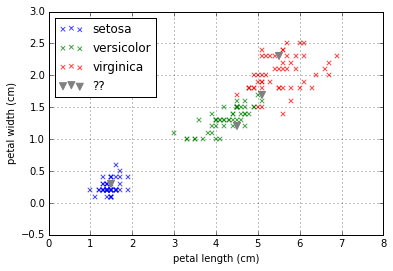

In [29]:
# pylab - loads numerical and graphical libraries into the IPython notebook
%pylab inline

# sklearn is a large collection of machine learning algorithms
# here we’ll use it only for the built-in iris dataset
from sklearn import datasets

iris = datasets.load_iris()

print('Features: ', iris.feature_names)
print('Targets: ', iris.target_names)

petal_length = iris.data[:, iris.feature_names.index('petal length (cm)')]
petal_width = iris.data[:, iris.feature_names.index('petal width (cm)')]

for target in set(iris.target):
    example_ids = target == iris.target
    scatter(petal_length[example_ids], petal_width[example_ids],
            label=iris.target_names[target], color='bgr'[target],
            marker='x', alpha=0.7)
unknown = np.array([
    [1.5, 0.3],
    [4.5, 1.2],
    [5.5, 2.3],
    [5.1, 1.7]
])
scatter(unknown[:, 0], unknown[:, 1], marker='v',
        color='gray', s=50, label='??')
xlabel('petal length (cm)')
ylabel('petal width (cm)')
grid(True)
legend(loc='upper left');

Based on these two features, it is easy to distinguish iris setosa from the two remaining species. Yet iris versicolor and virginica remain mixed together. 

Looking closely at the plot, we might estimate the species of the selected unknown irises (gray triangles). For three of them the answer seems obvious – they belong in uniformly-colored areas covered by one species only. Yet unknown iris flower in (5.1, 1.7) is troublesome – it lays on the boundary of versicolor and virginica clusters. We can assume, that its species is the one of the closest one to it, coming from the training set (and so having a label). 

K-Nearest Neighbors method (http://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) solves the classification problem, i.e. sets class labels (species in case of irises) of a previously unseen sample by choosing the most common class among the top k neighbors of the sample in question (for instance according to the Euclidean distance). Thus, the k-Nearest Neighbors algorithm works as follows. For each unlabeled sample x:
1. Find k nearest neighbors among the labeled samples.
2. Set the most common label among them as label of x.

## Problem 2 [2p]

1.  **[1p]** Load the iris data (in Python it’s built-in into machine learning libraries, use sklearn.datasets.load_iris), the data is also available on-line at https://archive.ics.uci.edu/ml/datasets/Iris

2.  **[1p]** Irises are described with 4 attributes: petal and sepal widths and lengths. We often plot such data as matrices depicting relationships between pairs of attributes (the diagonal of which holds an ordinary histogram). Write code making a plot like the one below. Please pay attention to the details: make a proper legend and correctly label the axes.

<img src="iris4x4.png"/>

In [77]:
from sklearn import datasets
iris = datasets.load_iris()

Populating the interactive namespace from numpy and matplotlib


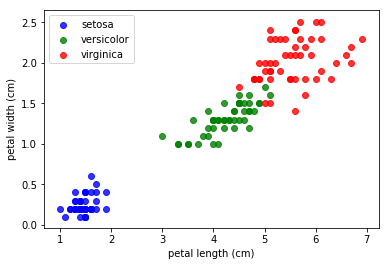

In [78]:
%pylab inline
petal_length = iris.data[:, iris.feature_names.index('petal length (cm)')]
petal_width = iris.data[:, iris.feature_names.index('petal width (cm)')]
sepal_length = iris.data[:, iris.feature_names.index('sepal length (cm)')]
sepal_width = iris.data[:, iris.feature_names.index('sepal width (cm)')]

for target in set(iris.target):
    example_ids = target == iris.target
    scatter(petal_length[example_ids], petal_width[example_ids],
            label=iris.target_names[target], color='bgr'[target],
            marker='o', alpha=0.8)
    
xlabel('petal length (cm)')
ylabel('petal width (cm)')
legend(loc='best');

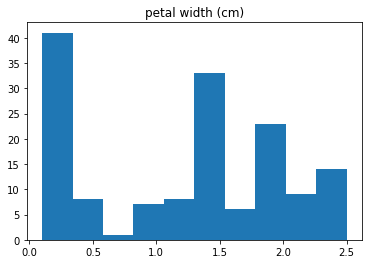

In [80]:
hist(petal_width, bins=10) 
title("petal width (cm)")
show()

## Problem 3 [2p]

Implement the k-Nearest Neighbors algorithm. Try to
take advantage of matrix calculus rather than using for loops.

**Tip:** What is computed by \begin{equation} \sqrt{(X - Y)^T (X - Y)} \end{equation} when both X and Y are vectors?

**Tip:** Try to use broadcasting (NumPy: http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) and built-ins sort, numpy.sort, numpy.argsort (sorting), scipy.stats.mode (choosing the most common element of the set).

In [64]:
def kNearest(trainingSet, unknownSet, targetSet, targetArray, k):
    petal_length = trainingSet[:, 2]
    petal_width = trainingSet[:, 3]
    train = np.hstack((np.reshape(petal_length, (-1, 1)), np.reshape(petal_width, (-1, 1))))
    result = []
    
    for u_elem in unknownSet:
        train -= u_elem #subtact the coordinates of the unknown element from each training element (through broadcasting)
        train2 = np.multiply(train,train) #get squares of each coordinate's difference
        distances = np.sqrt(train2[:,0]+train2[:,1]) #distance == sqrt of summed coordinate's difference squared 
        closest = np.argsort(distances)[:k] #get k closest elements' indexes

        targets = []
        for i in closest:
            targets.append(targetSet[targetArray[i]])#find corresponding targets to found indexes in the training set
        result.append(targets)
                
    return result

In [66]:
iris = datasets.load_iris()
unknown = np.array([
    [1.5, 0.3],
    [4.5, 1.2],
    [5.5, 2.3],
    [5.1, 1.7]
])

kNearest(iris.data, unknown, iris.target_names, iris.target, 50)

[['setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa',
  'setosa'],
 ['virginica',
  'virginica',
  'virginica',
  'virginica',
  'virginica',
  'virginica',
  'virginica',
  'virginica',
  'virginica',
  'virginica',
  'virginica',
  'virginica',
  'virginica',
  'virginica',
  'virginica',
  'virginica',
  'virginica',
  'virginica',
  'virginica',
  'virginica',
  'virginica',
  'virginica',
  'virginica',
  'virginica',
  'versicolor',
  'virginica',
  'virgi

## Problem 4 [2p]
Consider the following experiment:
1. We scramble the data and split it into two parts - training set (66.6% of all samples) and test set (33.4%).
2. Based on the training set, we use the k-NN algorithm to predict the labels on the test set.
3. We then check the number of errors and write it down.

Do this 500 times for k ∈ {1, 3, 5, ..., 19}. Plot a function of the average number of errors
as the function of k. It should be similar to the one below.

<img src="knn.png"/>

In [75]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

errors = []
for k in range(1,20, 2):
    suma = 0
    for i in range(500):
        
        permutation = np.random.permutation(np.linspace(0, 149, 150, endpoint=True, dtype=np.int))
        data = iris.data[permutation]
        labels = iris.target[permutation]
    
        result = (kNearest(data[:100], data[100:], iris.target_names, labels, k))#.T == labels[100:])
        print (result)
        suma += np.count_nonzero(result == False)
    
    errors.append(suma/500)

# print(errors)
plt.plot([i for i in range(1,20, 2)], errors, 'bo', [i for i in range(1,20, 2)], errors, 'b')
plt.show()

ValueError: operands could not be broadcast together with shapes (100,2) (4,) (100,2) 

In [69]:
np.random.permutation(np.linspace(0, 149, 150, endpoint=True, dtype=np.int))

array([137, 148,  14,  98,  21,  72, 104,   5, 119,  47, 128, 127, 103,
        49, 100,  92,  76,  90,  71,  18, 105,  10, 124, 149,  55, 122,
       107,  64,  70,  30,   9,  65, 133,  45,   6,  95,  89,  37,   7,
       116,  32, 101,  11,  15,  74, 132, 110,  81,  60,  53,  58, 108,
        41,  82, 125, 121,  34,  12,  80,  19,  57,  31, 138,  39,  79,
       109, 129,   8,  59,  85,  48, 136,  23, 134,  40, 142,  93,   2,
        69,  84,  36,  28,  86,  62, 118, 130,  24,  54,  22,  17, 146,
       139, 140,  73, 147,  16,  68,  50,  52,  44,  66,  96,  99, 131,
         4, 120,  63, 123, 115,  13,  27,  94, 106,   1, 114,  88,  83,
        56,  61,  67,  75, 113, 111, 144,   3,  33,  87,  35,   0,  42,
        20,  78,  46, 126,  25,  51, 102,  26, 135,  97, 145,  38,  29,
       143, 117,  91,  43,  77, 141, 112])

In [70]:
iris.data[:,iris.feature_names.index('petal length (cm)')]

array([ 1.4,  1.4,  1.3,  1.5,  1.4,  1.7,  1.4,  1.5,  1.4,  1.5,  1.5,
        1.6,  1.4,  1.1,  1.2,  1.5,  1.3,  1.4,  1.7,  1.5,  1.7,  1.5,
        1. ,  1.7,  1.9,  1.6,  1.6,  1.5,  1.4,  1.6,  1.6,  1.5,  1.5,
        1.4,  1.5,  1.2,  1.3,  1.5,  1.3,  1.5,  1.3,  1.3,  1.3,  1.6,
        1.9,  1.4,  1.6,  1.4,  1.5,  1.4,  4.7,  4.5,  4.9,  4. ,  4.6,
        4.5,  4.7,  3.3,  4.6,  3.9,  3.5,  4.2,  4. ,  4.7,  3.6,  4.4,
        4.5,  4.1,  4.5,  3.9,  4.8,  4. ,  4.9,  4.7,  4.3,  4.4,  4.8,
        5. ,  4.5,  3.5,  3.8,  3.7,  3.9,  5.1,  4.5,  4.5,  4.7,  4.4,
        4.1,  4. ,  4.4,  4.6,  4. ,  3.3,  4.2,  4.2,  4.2,  4.3,  3. ,
        4.1,  6. ,  5.1,  5.9,  5.6,  5.8,  6.6,  4.5,  6.3,  5.8,  6.1,
        5.1,  5.3,  5.5,  5. ,  5.1,  5.3,  5.5,  6.7,  6.9,  5. ,  5.7,
        4.9,  6.7,  4.9,  5.7,  6. ,  4.8,  4.9,  5.6,  5.8,  6.1,  6.4,
        5.6,  5.1,  5.6,  6.1,  5.6,  5.5,  4.8,  5.4,  5.6,  5.1,  5.1,
        5.9,  5.7,  5.2,  5. ,  5.2,  5.4,  5.1])

In [72]:
iris.data[:,iris.feature_names.index('petal length (cm)')][permutation]

array([ 6.7,  5. ,  4.7,  1.5,  5.6,  5.3,  4.2,  1.4,  1.9,  5.1,  3.6,
        6.1,  1.3,  4.7,  5.4,  1.5,  5.6,  1.5,  6. ,  4. ,  1.7,  4.6,
        3.3,  6.3,  5.6,  3.5,  4.9,  6.7,  5.1,  4.1,  1.3,  3.7,  5.1,
        3.9,  4.8,  1.4,  1.6,  5.6,  4.6,  1.4,  3.3,  6. ,  4.2,  6.1,
        5. ,  4.5,  1.7,  1.5,  5.4,  5.1,  1.4,  1.5,  1.4,  5. ,  4.5,
        5.1,  4.8,  4.5,  5.8,  1.5,  4. ,  3. ,  5.7,  1.6,  5.1,  4.5,
        6.4,  4.8,  5.7,  5.1,  1.5,  5.2,  1.6,  1.2,  4.3,  1.5,  5.8,
        1.4,  1.7,  4.7,  5.5,  4.4,  4.5,  3.9,  4.5,  3.9,  1.4,  1.1,
        1.4,  4.7,  1.6,  4.4,  4.5,  5. ,  4.1,  1.4,  5.1,  6.6,  4. ,
        1.3,  3.5,  4.9,  4.2,  4.4,  5.8,  6.1,  5.6,  4. ,  1.6,  4.5,
        1.4,  5.5,  1.5,  1.5,  4.4,  1.7,  4.8,  1.2,  4.7,  1.5,  4.3,
        1.4,  1.3,  3.8,  6.9,  5.7,  1.5,  5.2,  5.9,  4.9,  4.2,  1.5,
        1. ,  1.3,  1.6,  1.6,  1.3,  1.4,  5.3,  5.6,  4. ,  1.3,  1.9,
        4.9,  4.6,  1.5,  5.5,  4.1,  4.9,  5.9])

In [73]:
iris.data[permutation]

array([[ 7.7,  2.8,  6.7,  2. ],
       [ 6.3,  2.5,  5. ,  1.9],
       [ 6.7,  3.1,  4.7,  1.5],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 6.1,  2.6,  5.6,  1.4],
       [ 6.4,  2.7,  5.3,  1.9],
       [ 5.9,  3. ,  4.2,  1.5],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5.9,  3. ,  5.1,  1.8],
       [ 5.6,  2.9,  3.6,  1.3],
       [ 7.4,  2.8,  6.1,  1.9],
       [ 4.4,  3.2,  1.3,  0.2],
       [ 7. ,  3.2,  4.7,  1.4],
       [ 6.9,  3.1,  5.4,  2.1],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 6.7,  3.1,  5.6,  2.4],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 7.2,  3.2,  6. ,  1.8],
       [ 5.5,  2.3,  4. ,  1.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 6.5,  2.8,  4.6,  1.5],
       [ 5. ,  2.3,  3.3,  1. ],
       [ 7.3,  2.9,  6.3,  1.8],
       [ 6.4,  2.8,  5.6,  2.2],
       [ 5.7,  2.6,  3.5,  1. ],
       [ 6.9,  3.1,  4.9,  1.5],
       [ 7.7,  3.8,  6.7,  2.2],
       [ 6.3,  2.8,  5.1,  1.5],
       [ 5.7,  2.8,  4.1,  1.3],
       [ 4